Projekt polega na przeanalizowaniu i klasyfikacji rodzajów szkła z wykorzystniem poznanych narzędzi. W projekcie przeanalizowaliśmy zestaw danych zawierający informacje na temat składu, typu i charakterystyki różnych próbek szkła. Skupiliśmy się na znalezieniu zależności pomiędzy składem szkła a jego typem. W tym celu posłużyliśmy się metodami uczenia maszynowego. W tym celu wykorzystaliśmy następujące algorytmy:
- Metoda najbliższych sąsiadów (KNN)
- Metoda Support Vector Machines (SVM)
- Metoda regresji logistycznej
- Metoda drzewa decyzyjnego
- Metoda losowego lasu 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("./glass.csv")
print(data.head())
cols = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


Podstawowe informacje o danych:

In [33]:
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

Zestaw danych zawiera 214 próbek szkła, które zostały podzielone na 6 klas.
Plik z danymi składa się z informacji o indeksie refrakcji danego typu szkła, składzie szkła (z jakich pierwiastków się składa), oraz typie szkła - jego zastosowaniu.
Szkło jest wykonane w różnym stopniu z następujących pierwiastków: magnezu, aluminium, krzemu, potasu, wapna, baru i żelaza. 
Typy szkła to: przetworzone szkło budowlane typu float (building_windows_float_processed), przetworzone szkło budowlane typu nonfloat (building_windows_non_float_processed),
przetworzone szkło dla pojazdów float (vehicle_windows_float_processed), pojemników (containers), zastawy stołowej (tableware), reflektorów (headlamps). 
Typ oznaczony jako 4 nie występuje w bazie danych.
Każda próbka szkła przyjmuje tylko jedną z 6 klas.
Każda próbka szkła ma 10 atrybutów.

In [34]:
data_count_na = data.isna().sum()
print(data_count_na)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


W zbiorze danych nie ma brakujących wartości.

<AxesSubplot: >

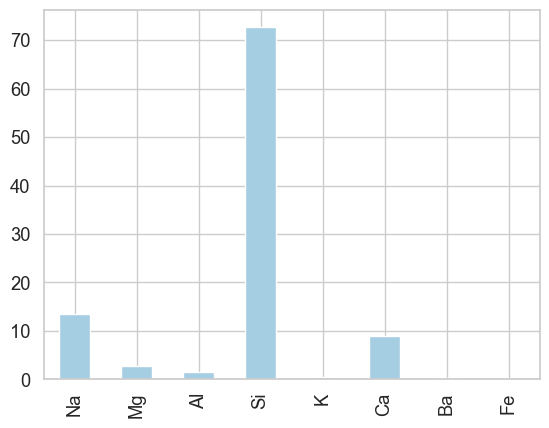

In [35]:
#Wykres zawartości poszczególnych pierwiastków

data_mean = data.drop(columns=["Type", "RI"],axis = 1)
data_mean = data_mean.mean()
data_mean.plot.bar()

Na powyższym wykresie przedstawiono średnią zawartość poszczególnych pierwiastków w szkłach.

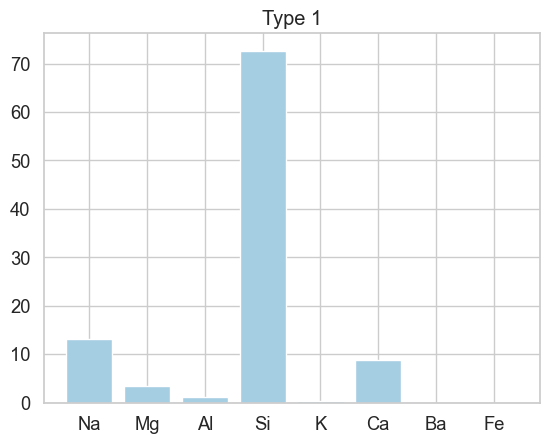

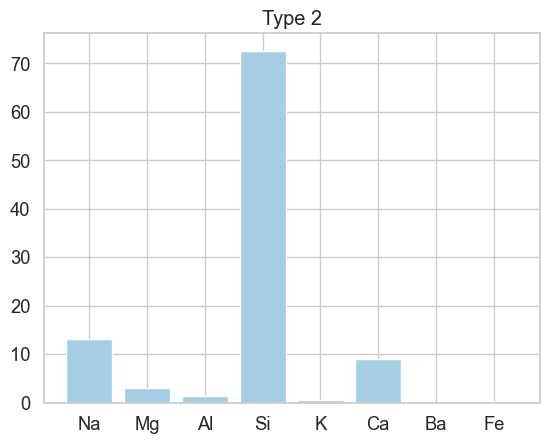

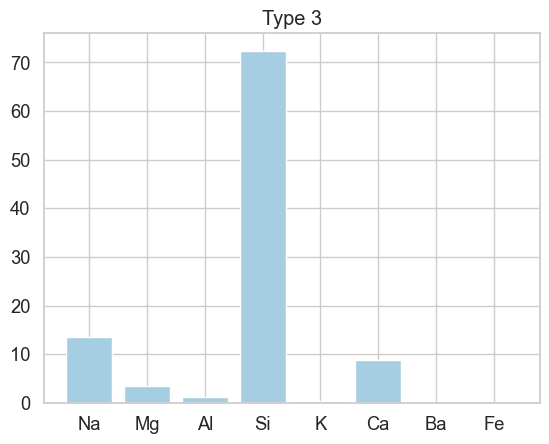

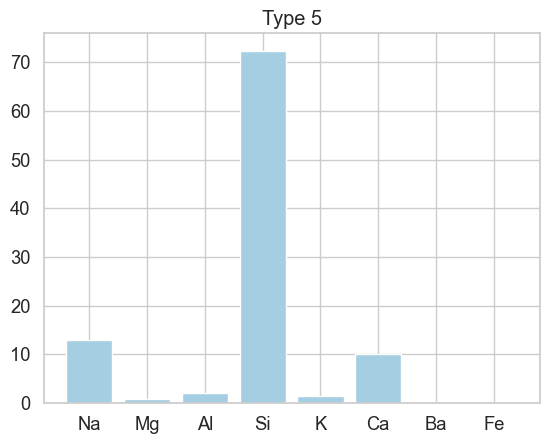

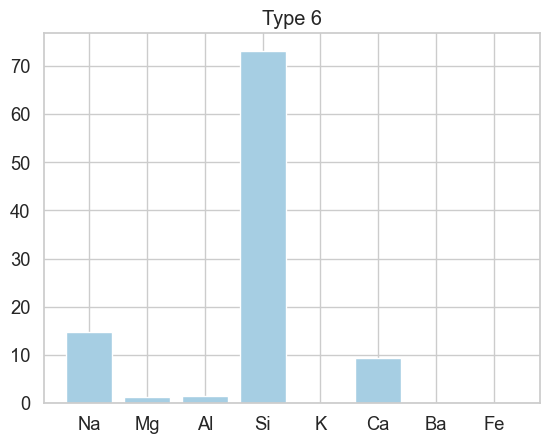

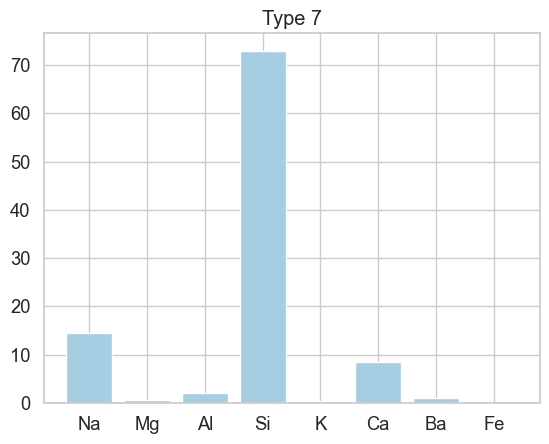

In [36]:
#Zawartość poszczególnych pierwiastków różnych typach szkła
data1 = data.drop(columns=["RI"],axis = 1)
x_values = ["Na","Mg","Al","Si","K","Ca","Ba","Fe"]
types = [1,2,3,5,6,7]
for i in types:
    data_plot = data1.loc[data['Type'] == i]
    data_plot = data_plot.drop(columns=["Type"],axis = 1)
    data_plot = data_plot.mean()
    y_values = data_plot.tolist()
    plt.title(f'Type {i}')
    plt.bar(x_values,y_values)
    plt.show()
#    data_plot.plot.bar()


Na powyższym wykresie przedstawiono średnią zawartość poszczególnych pierwiastków w typach szkła.

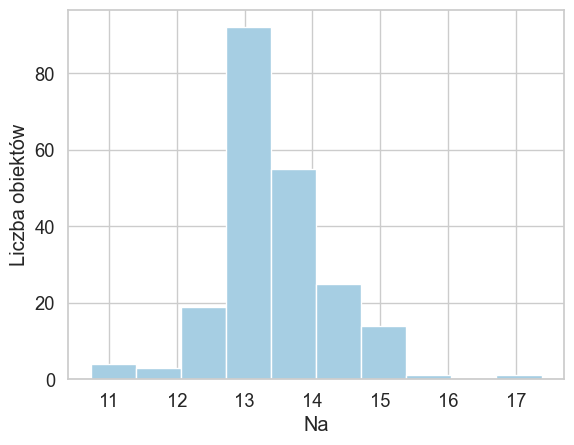

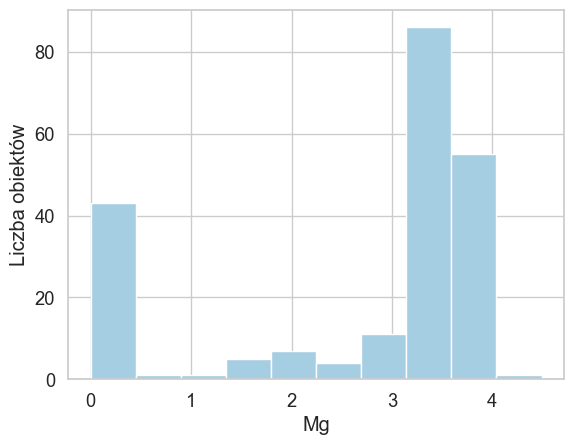

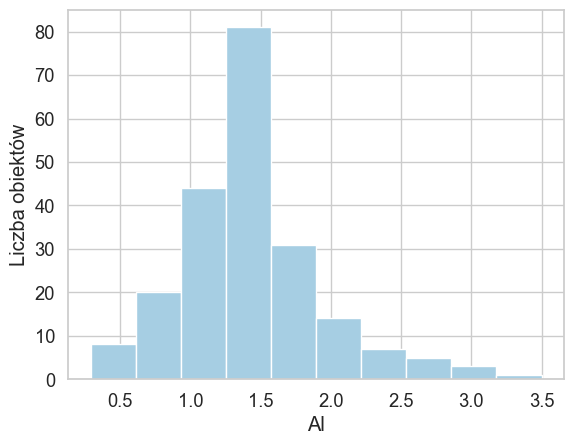

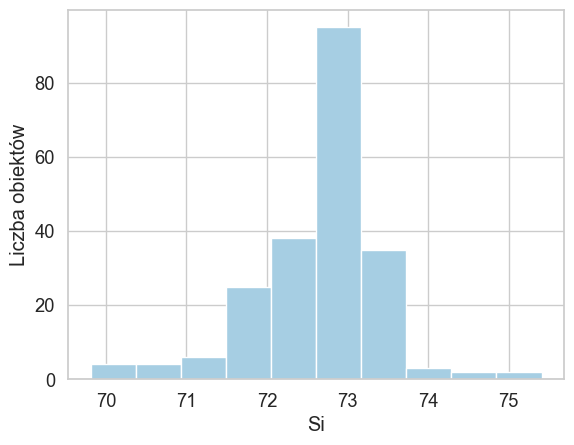

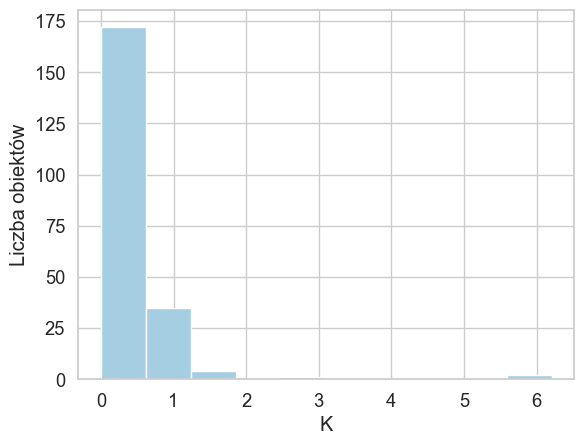

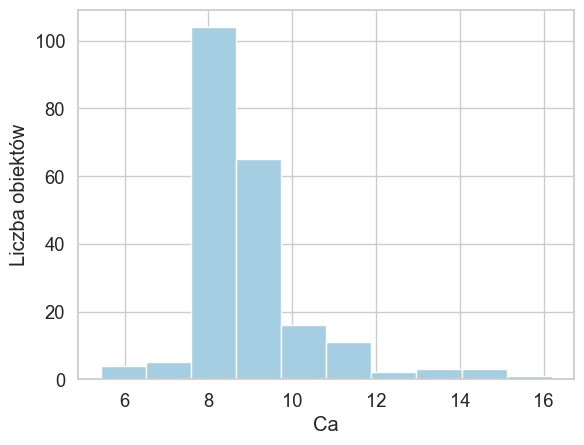

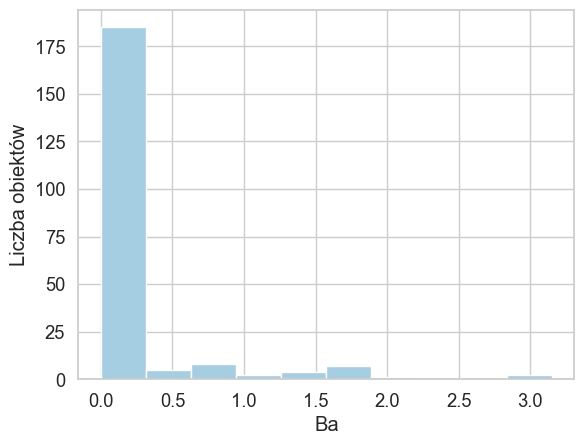

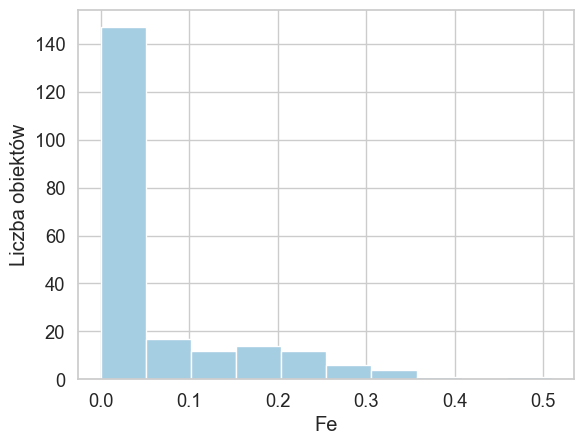

In [37]:
#Liczba obiektów o poszczególnej zawartości 
for i in data[x_values].columns:
    plt.hist(data[x_values][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

Na powyższym wykresie przedstawiono rozkład zawartości pierwiastków w całym zbiorze danych.

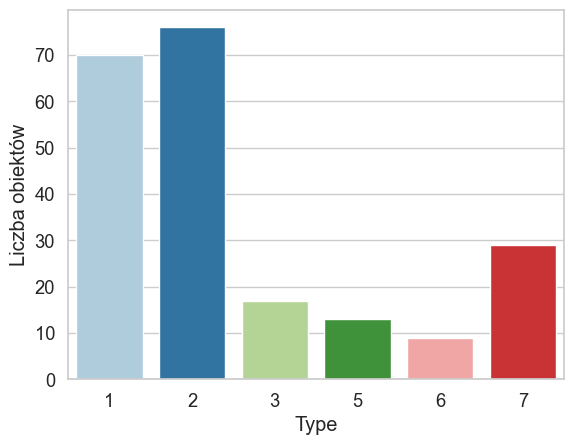

In [38]:
for i in data[['Type']].columns:
    sns.barplot(x=data[['Type']][i].value_counts().index,y=data[['Type']][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

Na powyższym wykresie przedstawiono ilość próbek szkła w poszczególnych typach.

<AxesSubplot: >

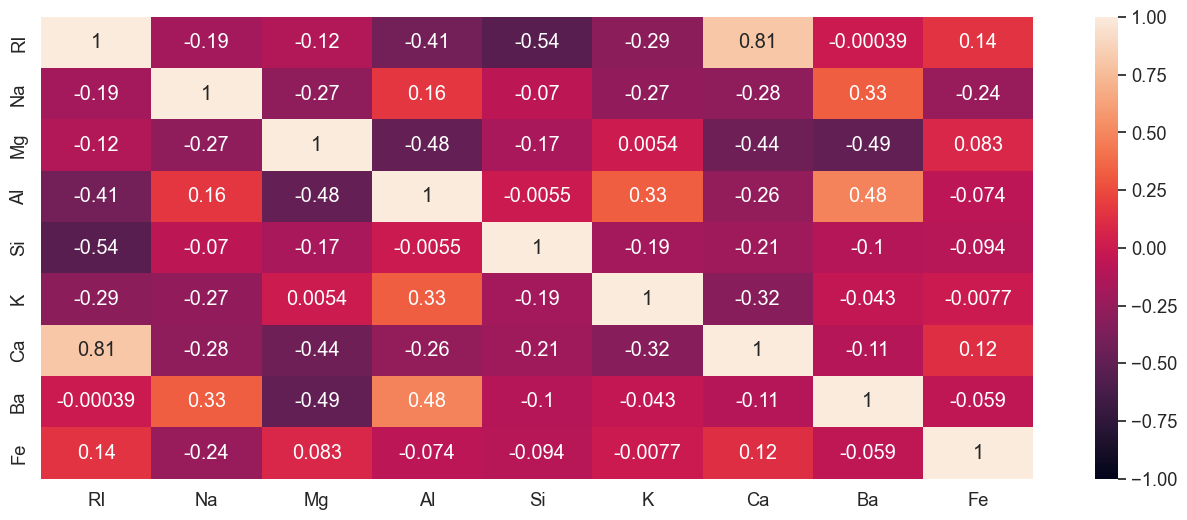

In [39]:
plt.figure(figsize=(16, 6))
sns.heatmap(data[cols].corr(method='pearson'), vmin=-1, vmax=1, annot=True)

Jak widać największa korelacja pierwiastków jest między  Mg i Ba (-0,49) oraz Al i Mg (-0,48) oraz współczynnik RI i pierwiastka Ca (0,81) i Si(-0,54)

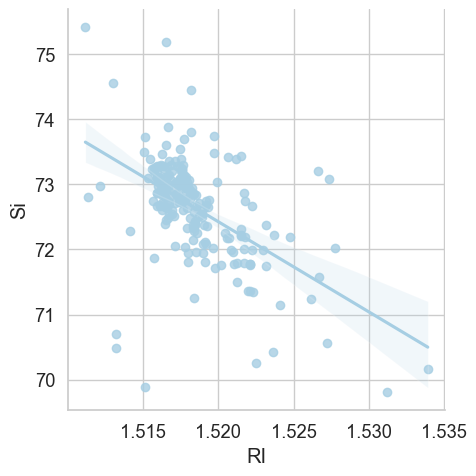

In [40]:
#Wykres najbardziej skorelowanych zmiennych
sns.lmplot(x='RI', y='Si', data=data)
plt.show()

Na powyższym wykresie korelacji refrakcji z zawartością krzemu widać, że istnieje dominująca korelacja, ale także sporo punktów, które nie wykazują takiej zależności.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


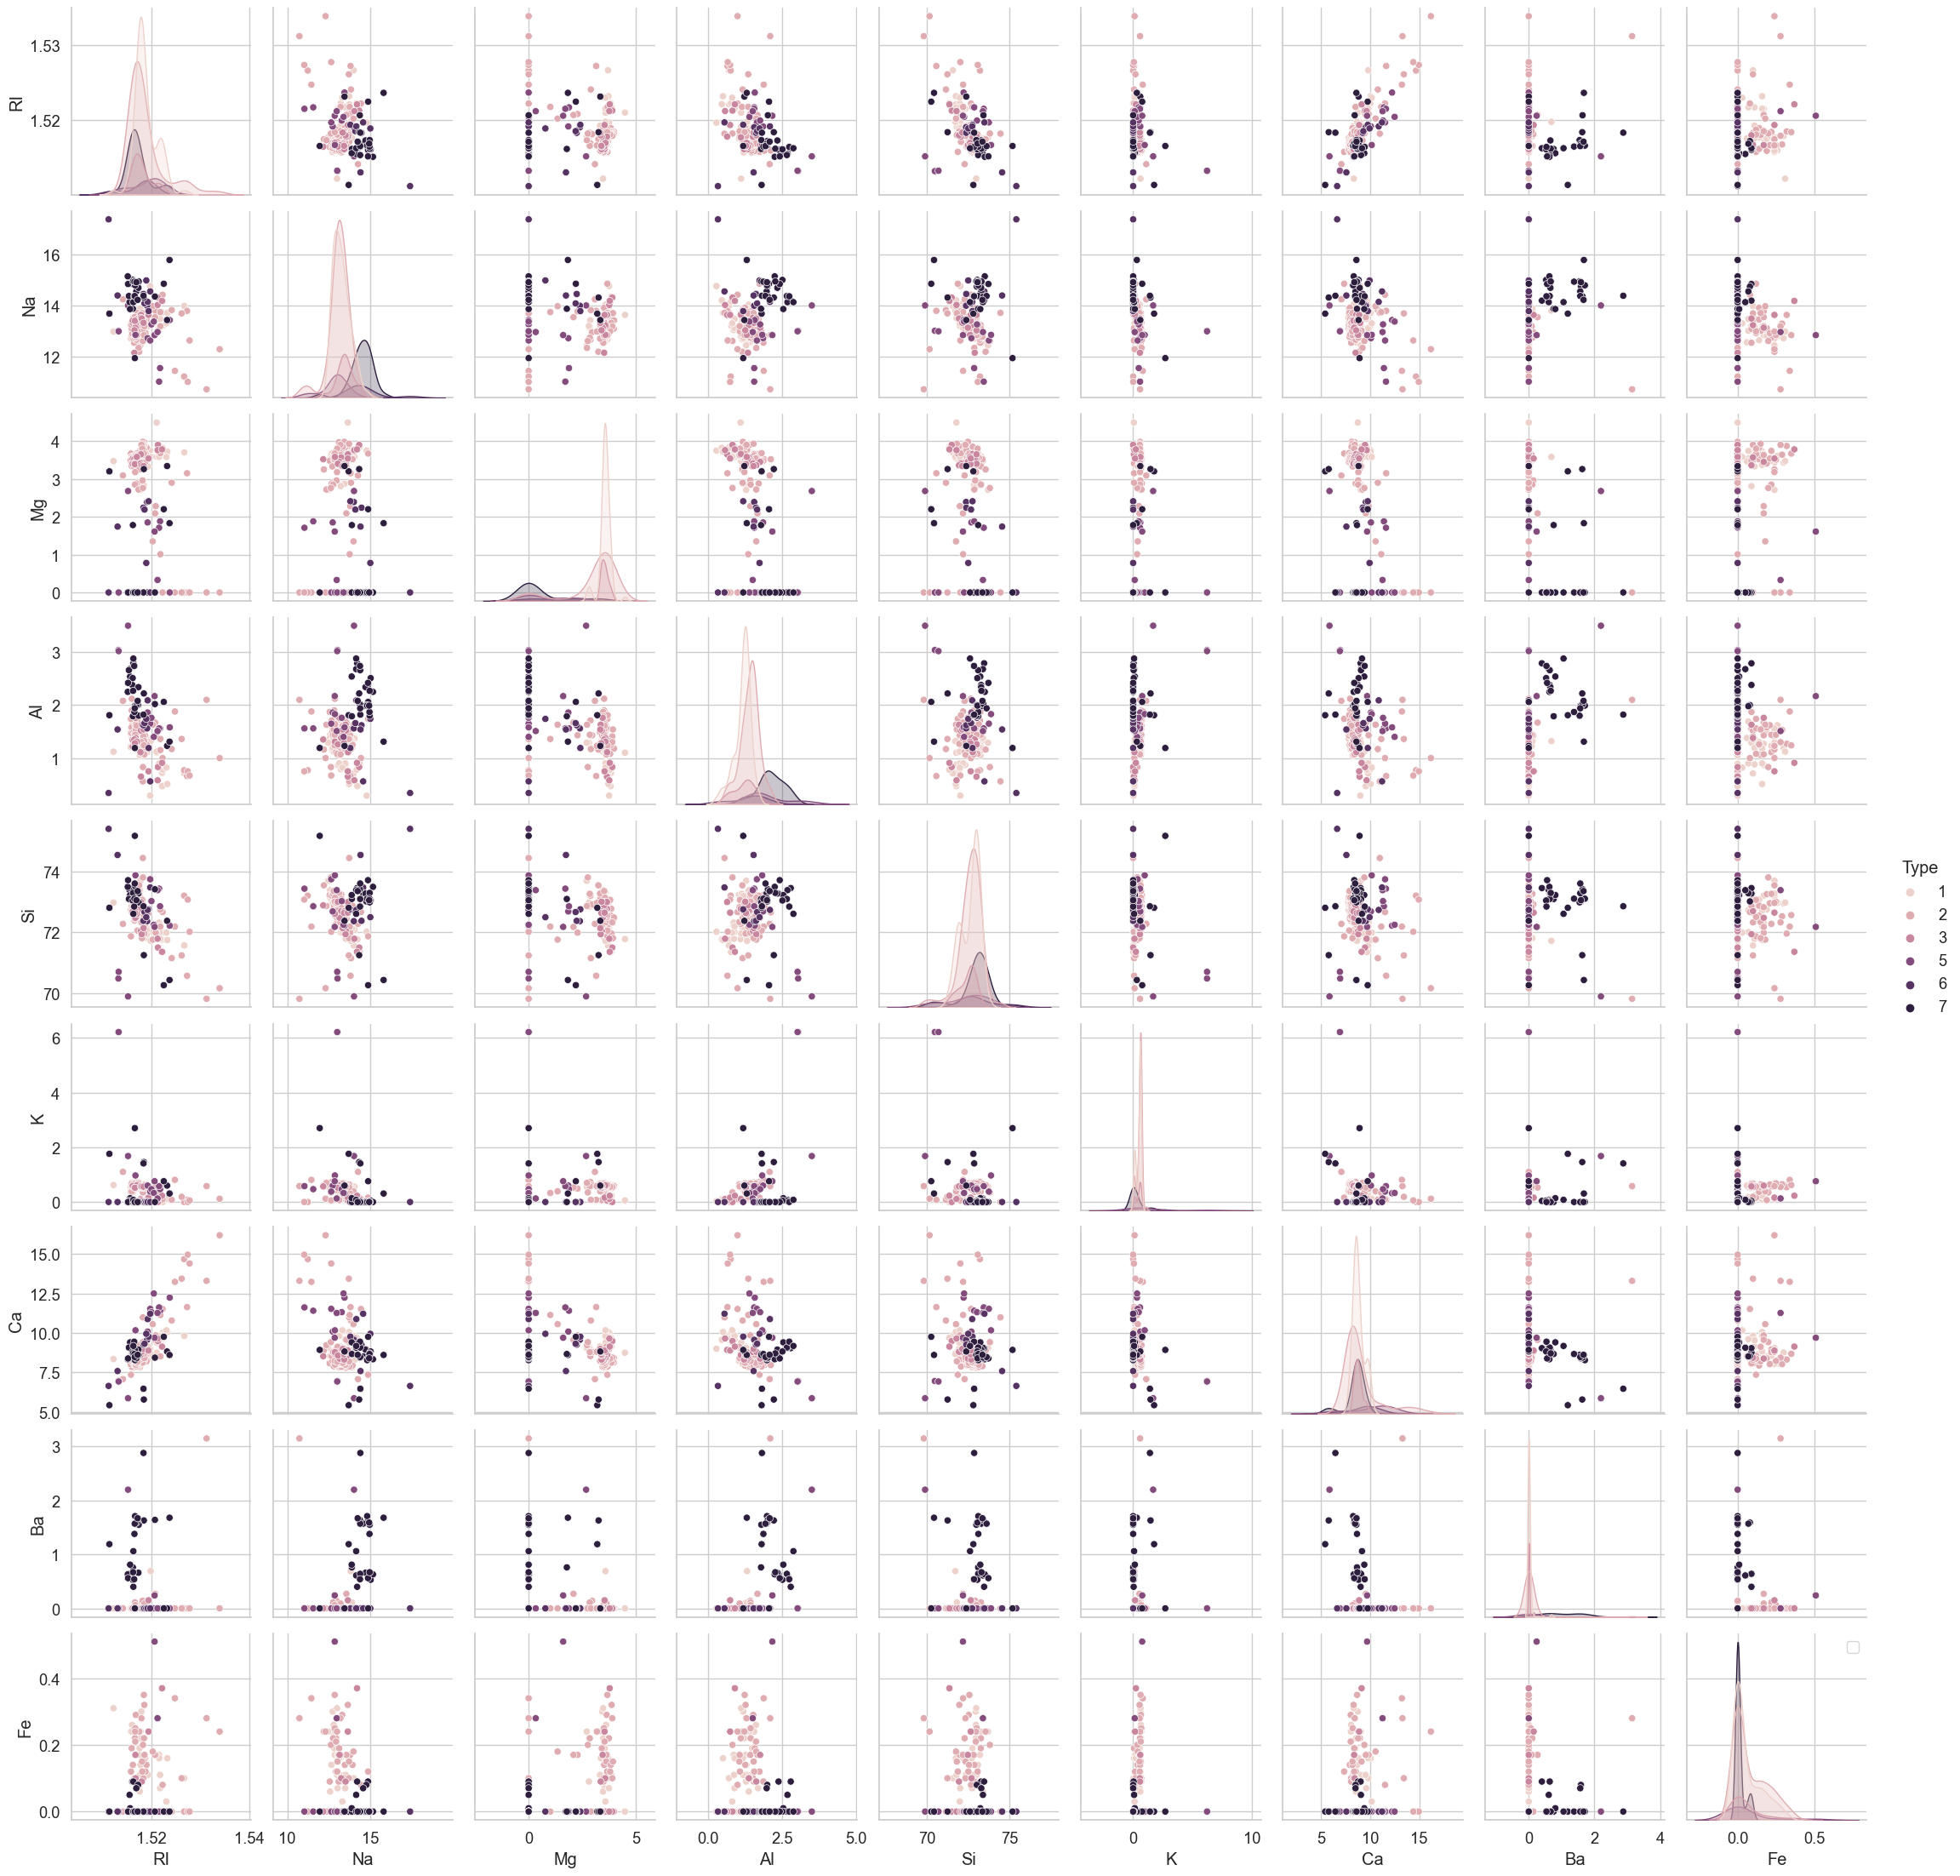

In [41]:
sns.pairplot(data,hue='Type')
plt.legend()
plt.show()

C:\Users\Karol\AppData\Local\Temp\ipykernel_11376\1659797345.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i)


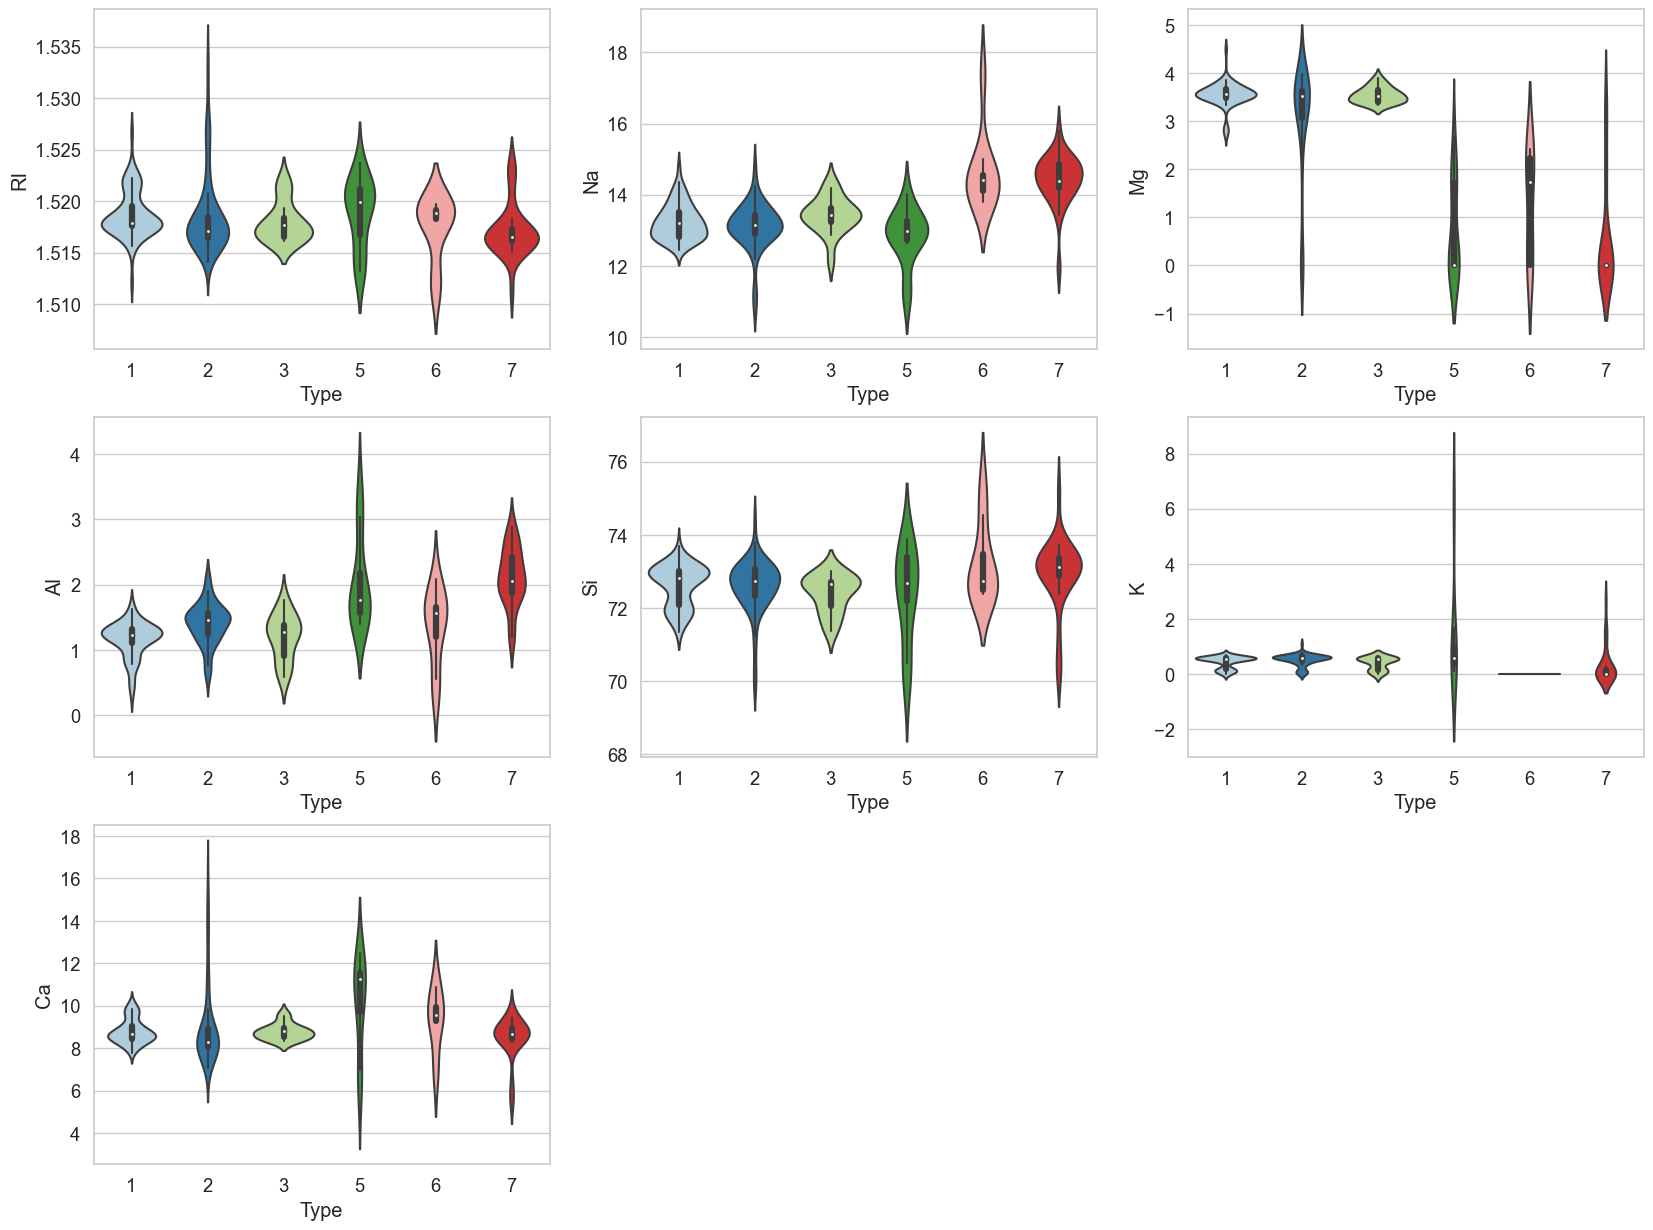

In [42]:
sns.set(style = "whitegrid", font_scale = 1.2, palette = "Paired")
plt.subplots(figsize = (20, 15))

for i in range(1,8):
    plt.subplot(3, 3, i)
    sns.violinplot(x = 'Type', y = cols[i-1], data = data)

Teraz wykorzystam algorytm najbliższych sąsiadów (KNN) do przewidywania typu szkła na podstawie jego składu.

In [59]:
X = data.drop("Type", axis=1) # wybierz wszystkie kolumny oprócz kolumny Type jako dane wejściowe
y = data["Type"] # wybierz kolumnę Type jako dane wyjściowe

# Podzielenie danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie i trening modelu k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Ocena modelu na zestawie testowym
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6511627906976745


Wniosek:
Model k-NN działa całkiem dobrze w tym zbiorze danych, ponieważ osiąga dosyć wysoki poziom dokładności (65,6%) na zestawie testowym. Można dalej próbować zmienić liczbę sąsiadów (parametr n_neighbors) lub inne parametry modelu, aby poprawić jego dokładność.

W celu poprawy dokładności modelu można spróbować:
-Zmianić liczbę sąsiadów (parametru n_neighbors) - może to pomóc uzyskać lepsze dopasowanie do danych,
-Zmienić metrykę - domyślnie używana jest metryka euklidesowa, ale inne metryki, takie jak manhattan, czy minkowski mogą działać lepiej w przypadku danego zbioru,
-Znormalizować dane - jeśli dane wejściowe są w różnych skalach, warto je znormalizować, aby uzyskać lepsze dopasowanie do danych,

Poniższy kod używa tej samej metody, ale zwiększa liczbę sąsiadów oraz używa metryki manhattan:

In [44]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6744186046511628


Wniosek:
Jak widać inna metryka i inne parametry poprawiły dokładność tylko minimalnie.

Spójrzmy na dokładność modelu dla różnych wartości parametru n_neighbors:

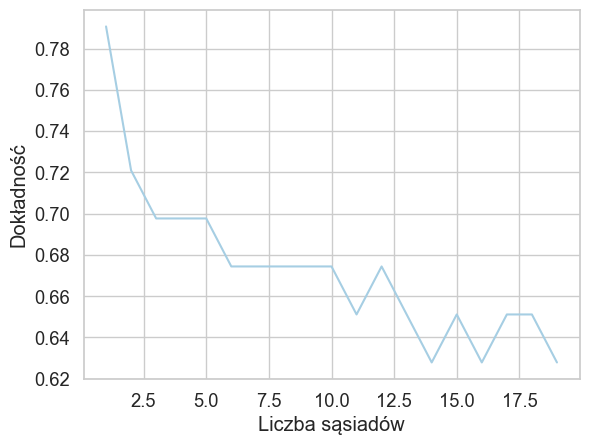

In [45]:
# tworzenie listy z dokładnością dla różnych liczb sąsiadów
accuracies = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# wykres zależności dokładności od liczby sąsiadów
plt.plot(range(1, 20), accuracies)
plt.xlabel("Liczba sąsiadów")
plt.ylabel("Dokładność")
plt.show()

Jak widać najlepsza dokładność osiąga się dla n_neighbors = 1, a dla większych wartości dokładność maleje.
Finalnie wykorzystam model k-NN z n_neighbors = 1 i metryką manhattan:

In [46]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7906976744186046


Osiągnieta dokładność na poziomie 79% świadczy o tym, że model działa całkiem dobrze.

Sprawdźmy jak wygląda macierz pomyłek:

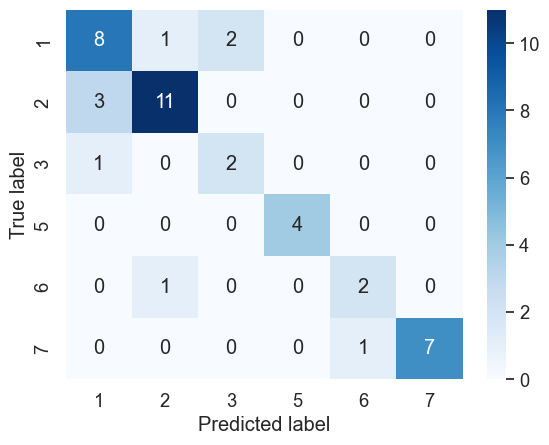

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, xticklabels=types, yticklabels=types, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Wykres ten prezentuje macierz pomyłek jako mapę ciepła, gdzie jasniejsze kolory oznaczają więcej pomyłek, a ciemniejsze kolory oznaczają mniej pomyłek. Oś x to etykiety przewidziane przez model, a oś y to rzeczywiste etykiety.

Wniosek:
Wykres pokazuje, że model nie radzi sobie z klasami 5 i 6, ponieważ nie zaklasyfikował żadnych przypadków jako te klasy. W przypadku innych klas, model sklasyfikował kilka przypadków niepoprawnie, ale ogólnie radzi sobie całkiem dobrze z klasyfikowaniem przypadków.

Teraz wykonam analogiczną analizę wykorzystując algorytm SVM.

In [48]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7441860465116279


Jak widać model SVM bez żadnych zmian osiąga dokładność na poziomie 74%, czyli lepiej niż model k-NN.

Spójrzmy na macierz pomyłek:

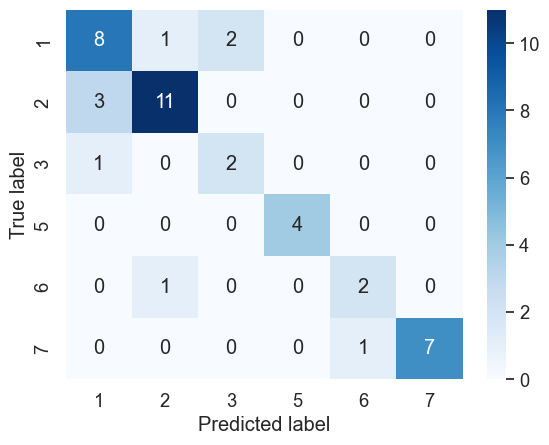

In [49]:
sns.heatmap(conf_matrix, annot=True, xticklabels=types, yticklabels=types, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Jak widać algorytm ten robi trochę błędów, w różnych klasach. Pomyłki te mogą wynikać z: 
-Użyciu tylko jednego typu jądra - można spróbować użyć innych jąder, aby uzyskać lepsze dopasowanie do danych, 
-Jeżeli wystąpią wartości "skośne" w danych, warto je skalować, aby uzyskać lepsze dopasowanie do danych, 
-Nieodpowiednio dobrany parametr C - można spróbować zmienić parametr C, aby uzyskać lepsze dopasowanie do danych. 
 
Spróbujmy zoptymalizować ten algorytm: 

In [50]:
# podział zbioru na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# parametry do dostosowywania
parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C':[0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# klasyfikator SVM
svc = SVC()

# GridSearchCV dla automatycznego dostosowywania parametrów
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

# wybór najlepszych parametrów
best_params = clf.best_params_
print(best_params)

# tworzenie nowego klasyfikatora SVM z najlepszymi parametrami
svc_best = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svc_best.fit(X_train, y_train)

# ocena skuteczności modelu na zbiorze testowym
test_accuracy = svc_best.score(X_test, y_test)
print("Test accuracy: ", test_accuracy)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test accuracy:  0.6744186046511628


W powyższym kodzie najpierw dzielimy zbiór na zbiór treningowy i testowy, następnie standaryzujemy dane, a następnie definiujemy parametry do dostosowywania. 
Następnie tworzymy klasyfikator SVM i używamy GridSearchCV do automatycznego dostosowywania parametrów. 
Po zakończeniu dostosowywania parametrów wybieramy najlepsze parametry i tworzymy nowy klasyfikator SVM z najlepszymi parametrami. 

Jak widać dokładność modelu wyniosła około 67%  - nie jest to lepsze dopasowanie do danych, gorsze niż model k-NN.


Teraz przeanalizujmy algorytm regresji logistycznej dla naszego zbioru danych.

c:\Users\Karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7076923076923077


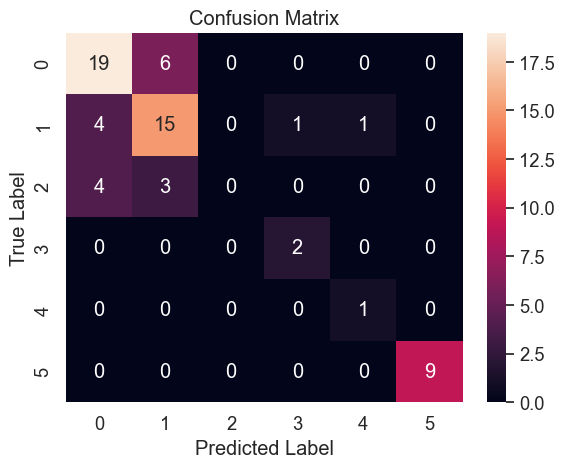

In [60]:
# Podział na zbiór treningowy i testowy
X = data.drop("Type", axis=1)
y = data["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Tworzenie i trenowanie modelu
model = LogisticRegression()
model.fit(X_train, y_train)

# Ocena modelu
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Tworzenie i wyświetlanie macierzy pomyłek
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Wnioski:
Regresja logistyczna jest dobrym wyborem do klasyfikacji binarnej, ale niekoniecznie do problemów wieloklasowych, takich jak ten.
Widać to po ocenie dokładności algorytmu na poziomie 70 % oraz macierzy pomyłek.
Warto rozważyć użycie innych algorytmów, takich jak drzewa decyzyjne w celu uzyskania lepszych wyników.

Teraz przeanalizujemy działanie algorytmu drzewa decyzyjnego.

Accuracy: 0.7692307692307693
Best parameters: {'max_depth': 6}


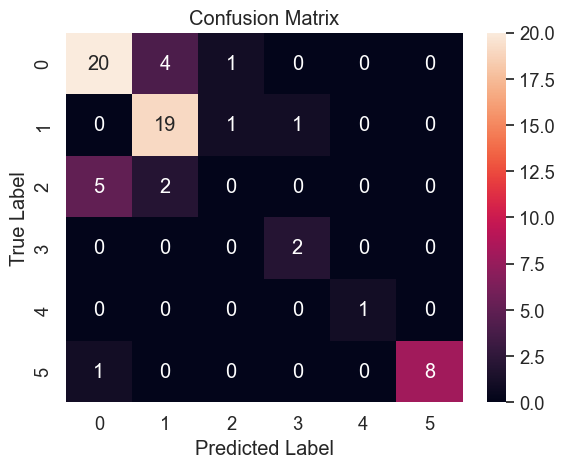

In [66]:
# Podział na zbiór treningowy i testowy
X = data.drop("Type", axis=1)
y = data["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Tworzenie i trenowanie modelu
model = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Ustawianie hiperparametrów dla modelu
param_grid = {'max_depth': range(1, 20)}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Ocena modelu
y_pred = grid_search.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Best parameters:", grid_search.best_params_)

# Tworzenie i wyświetlanie macierzy pomyłek
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Wnioski:
Zmiana hiperparametrów drzewa decyzyjnego za pomocą GridSearchCV pozwala na znalezienie optymalnej wartości max_depth, co może poprawić dokładność modelu.
Ostateczna dokładność modelu zależy od wybranej wartości max_depth.
Model drzewa decyzyjnego osiągnął dokładność około 76%, co sugeruje, że może nie być doskonałym rozwiązaniem dla tego zadania klasyfikacji.

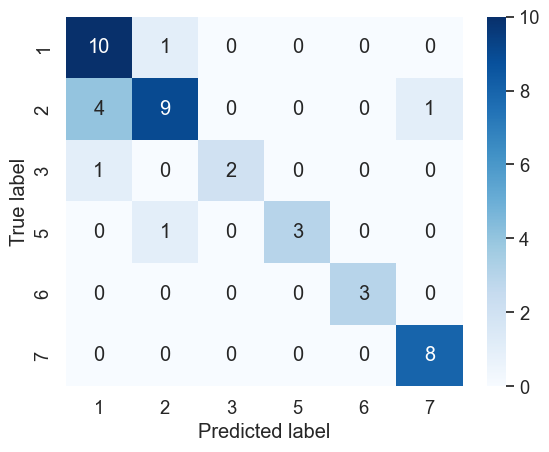

Accuracy: 81.40%
Precision: 83.49%
Recall: 81.40%
F1-Score: 81.16%
Feature ranking:
1. feature 2 (0.167430)
2. feature 0 (0.159554)
3. feature 3 (0.157422)
4. feature 6 (0.127638)
5. feature 1 (0.105310)
6. feature 5 (0.085437)
7. feature 4 (0.083247)
8. feature 7 (0.074443)
9. feature 8 (0.039519)


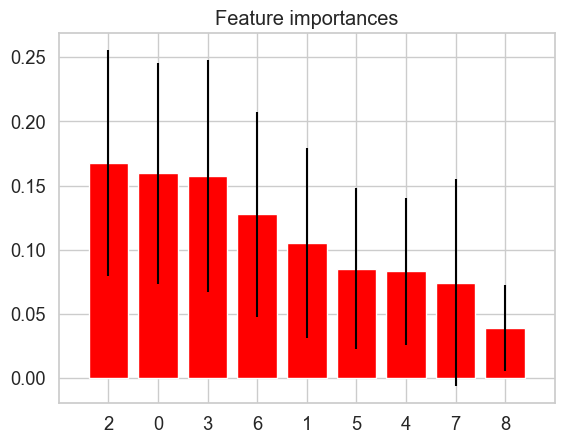

In [65]:

X = data.drop("Type", axis=1)
y = data["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

clf_best = RandomForestClassifier(**best_params)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)

conf_mat_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_mat_best, annot=True, xticklabels=types, yticklabels=types, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-Score: {:.2f}%".format(f1*100))

importances = clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_best.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()



Na podstawie wyników wygenerowanych przez program, możemy dojść do następujących wniosków:

Model losowego lasu osiągnął wysoki poziom dokładności (Accuracy) wynoszący około 81%. Oznacza to, że model jest w stanie dokładnie przewidzieć typ szkła w większości przypadków.

Wartości precyzji i recall są również wysokie, co oznacza, że model jest dobrze w stanie zarówno znaleźć prawdziwe pozytywne przypadki (szkło którego chcemy znaleźć), jak i unikać fałszywych pozytywnych (szkło którego nie chcemy znaleźć).

F1-Score jest również wysoki, co oznacza, że model dobrze łączy precyzję i recall.

Ważności cech wykazują, że najważniejszymi cechami dla modelu są "Ca", "Mg" i "Al". Oznacza to, że te pierwiastki są najważniejsze dla modelu do prawidłowego zaklasyfikowania typu szkła.

Wniosek z tego jest taki, że model losowego lasu jest skutecznym narzędziem do klasyfikacji typów szkła na podstawie dostępnych danych.

Podsumowując, przeanalizowaliśmy zbiór danych pod kątem zawartości danych, po analizie eksploracyjnej postanowiliśmy wybrać kilka klasyfikatorów i zestawić je ze sobą w celu wybrania najlepszego, osiągając w najlepszych wypadkach okolo 80% dokładności klasyfikacji przy algorytmach losowego lasu oraz najbliższego sąsiada. Więc są to najlepsze klasyfikatory przy naszym ograniczonym zbiorze danych (tylko 214 próbek). 